In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn

# Some plotting config
seaborn.set(
    context="notebook",
    # style="ticks",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.5,
)
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
# plt.rcParams["xtick.top"] = True
# plt.rcParams["ytick.right"] = True
# plt.rcParams["xtick.bottom"] = True
# plt.rcParams["ytick.left"] = True
plt.rcParams["mathtext.fontset"] = "cm"

from tqdm.auto import tqdm, trange

from ssptools import evolve_mf_3 as emf3
from limepy import limepy

import numpy as np
import scipy as sp
import astropy.units as u
import astropy.constants as const

from binaryshift import BinaryShift

from fitter import Observations
from fitter import Model

In [3]:
obs = Observations("NGC0104")

In [7]:
theta = [6.62, 0.88, 6.82, 1.33, 1.03, 0.37, 0.01, 3.49, 0.47, 1.18, 2.15, 0.13, 4.42]

In [8]:
model = Model(theta=theta, observations=obs)

/home/peter/anaconda3/envs/gcfit/lib/python3.8/site-packages/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)


In [14]:
binshift = BinaryShift(mj=model.mj.value, Mj=model.Mj.value, MF=model._mf)

In [21]:
(
    mj,
    Mj,
) = binshift.shift_flat(0.05)
mj, Mj = binshift.rebin()

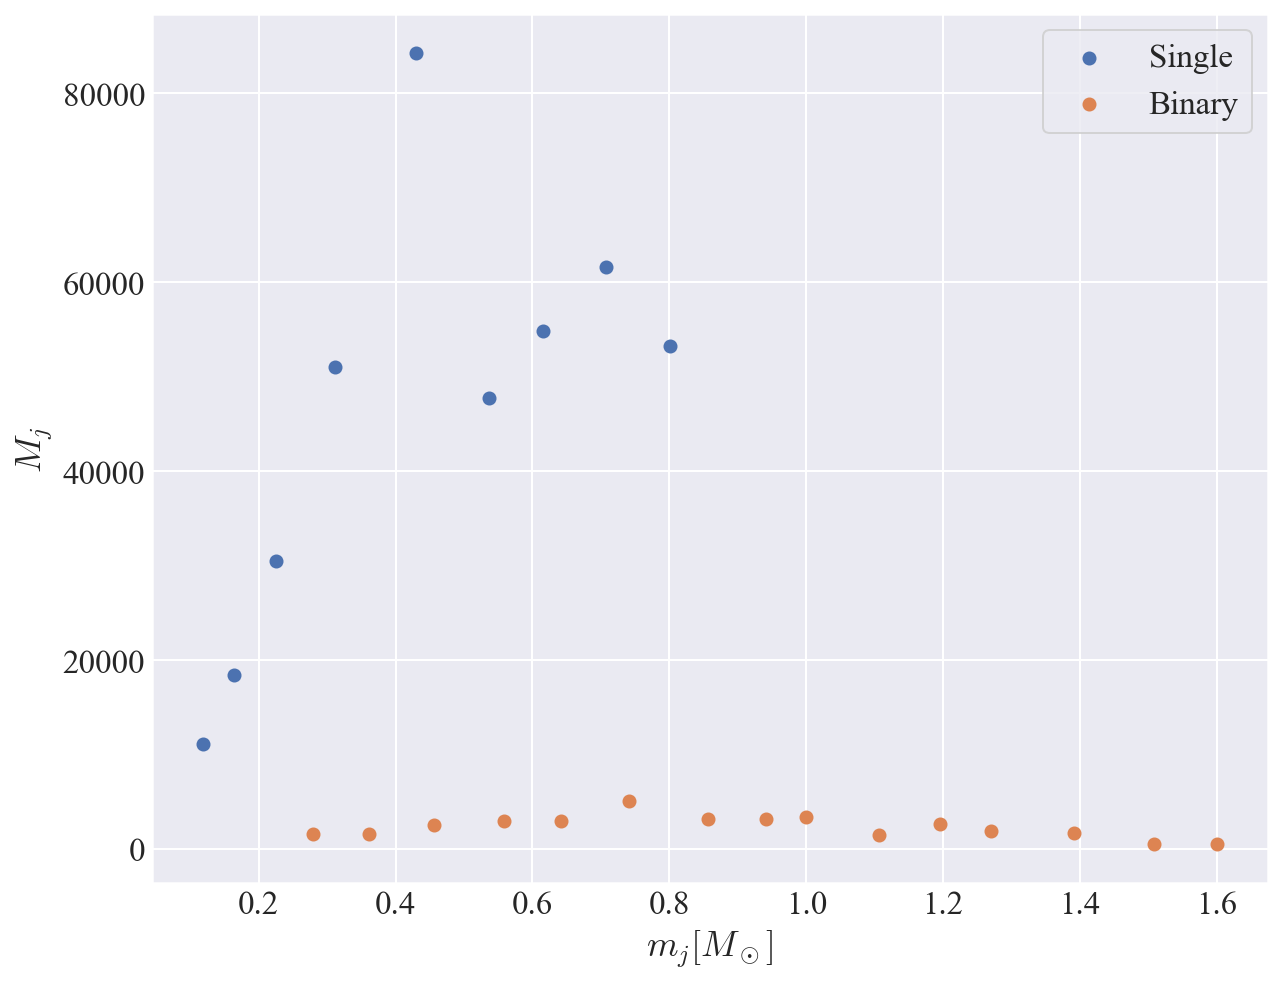

In [24]:
plt.figure()
plt.xlabel(r"$m_j [M_\odot]$")
plt.ylabel(r"$M_j$")
plt.scatter(mj[binshift.MS_mask], Mj[binshift.MS_mask], label="Single")
plt.scatter(mj[binshift.bin_mask], Mj[binshift.bin_mask], label="Binary")
plt.legend()

In [27]:
# make binshift from gcfit
def from_gcfit(model):

    # make binshift instance
    binshift = BinaryShift(mj=model.mj.value, Mj=model.Mj.value, MF=model._mf)

    # set some gcfit flag to True

    return binshift

In [28]:
# shoudl go through and update things to check if there's a gcfit flag, then use units properly if we do

In [29]:
dir(model)

['A',
 'BH_Mj',
 'BH_Nj',
 'BH_Sigmaj',
 'BH_mj',
 'BH_rhoj',
 'BHret',
 'F',
 'G',
 'K',
 'Kj',
 'Kr',
 'Krj',
 'Kt',
 'Ktj',
 'M',
 'Mj',
 'NS_Mj',
 'NS_Nj',
 'NS_Sigmaj',
 'NS_mj',
 'NS_rhoj',
 'Nj',
 'R',
 'Sigma',
 'Sigmaj',
 'U',
 'W0',
 'WD_Mj',
 'WD_Nj',
 'WD_Sigmaj',
 'WD_mj',
 'WD_rhoj',
 '_BH_bins',
 '_GS',
 '_MS',
 '_Mjtot',
 '_NS_bins',
 '_RS',
 '_WD_bins',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_assign_units',
 '_beta',
 '_get_v2',
 '_init_mf',
 '_init_multi',
 '_init_rot',
 '_interpolator_set',
 '_logcheck',
 '_mBH_min',
 '_mWD_max',
 '_mf',
 '_odes',
 '_phil_rot',
 '_poisson',
 '_poisson_rot',
 '_project',
 '_remnant_bins',
 '_rhohat',
 '_rhoh

In [30]:
import astropy.units as u

In [31]:
d = 1 * u.day

In [34]:
type(d.unit)

astropy.units.core.Unit

In [35]:
a = 5

In [40]:
a <<= u.day

In [41]:
a

<Quantity 5. d>